# KNN no `chb12_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb12_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.737762,0.839161,0.902098,0.877622,0.695804,0.874126,0.898601,0.867133,0.744755,0.891608,0.905594,0.839161,0.783217,0.891608,0.940559,0.884615,0.877622,0.877622
1,0.783217,0.849650,0.902098,0.909091,0.769231,0.842657,0.891608,0.839161,0.800699,0.895105,0.877622,0.793706,0.804196,0.902098,0.944056,0.912587,0.811189,0.849650
2,0.783217,0.818182,0.881119,0.888112,0.783217,0.856643,0.895105,0.909091,0.762238,0.909091,0.916084,0.811189,0.786713,0.905594,0.951049,0.902098,0.825175,0.797203
3,0.790210,0.790210,0.916084,0.909091,0.758741,0.828671,0.881119,0.856643,0.737762,0.902098,0.888112,0.797203,0.779720,0.905594,0.958042,0.905594,0.835664,0.786713
4,0.744755,0.811189,0.898601,0.877622,0.748252,0.860140,0.870629,0.898601,0.730769,0.895105,0.888112,0.783217,0.748252,0.916084,0.926573,0.884615,0.821678,0.846154
5,0.793706,0.811189,0.884615,0.881119,0.779720,0.863636,0.849650,0.846154,0.744755,0.902098,0.905594,0.807692,0.786713,0.898601,0.944056,0.898601,0.807692,0.828671
6,0.755245,0.793706,0.909091,0.877622,0.741259,0.846154,0.867133,0.860140,0.734266,0.895105,0.877622,0.811189,0.748252,0.884615,0.958042,0.916084,0.856643,0.860140
7,0.769231,0.765734,0.912587,0.884615,0.685315,0.863636,0.856643,0.846154,0.737762,0.895105,0.891608,0.790210,0.737762,0.881119,0.930070,0.867133,0.839161,0.832168
8,0.744755,0.800699,0.923077,0.923077,0.734266,0.849650,0.860140,0.884615,0.723776,0.912587,0.916084,0.818182,0.769231,0.902098,0.961538,0.898601,0.825175,0.849650
9,0.741259,0.797203,0.905594,0.898601,0.730769,0.853147,0.891608,0.849650,0.751748,0.895105,0.909091,0.804196,0.769231,0.919580,0.933566,0.916084,0.828671,0.839161


,count,mean,std,min,25%,50%,75%,max
14,20.0,0.940909,0.011619,0.919580,0.932692,0.940559,0.948427,0.961538
2,20.0,0.904196,0.010845,0.881119,0.901224,0.905594,0.909965,0.923077
13,20.0,0.902797,0.013594,0.874126,0.896853,0.905594,0.909091,0.930070
15,20.0,0.898252,0.015550,0.867133,0.889860,0.898601,0.909091,0.923077
3,20.0,0.892308,0.014947,0.856643,0.883741,0.891608,0.902972,0.923077
10,20.0,0.891434,0.016379,0.849650,0.883741,0.891608,0.905594,0.916084
9,20.0,0.890734,0.011562,0.870629,0.886364,0.891608,0.895105,0.912587
6,20.0,0.865035,0.020051,0.818182,0.854895,0.863636,0.873252,0.898601
7,20.0,0.862762,0.019937,0.839161,0.846154,0.858392,0.875000,0.909091
5,20.0,0.852972,0.015198,0.818182,0.845280,0.856643,0.863636,0.874126


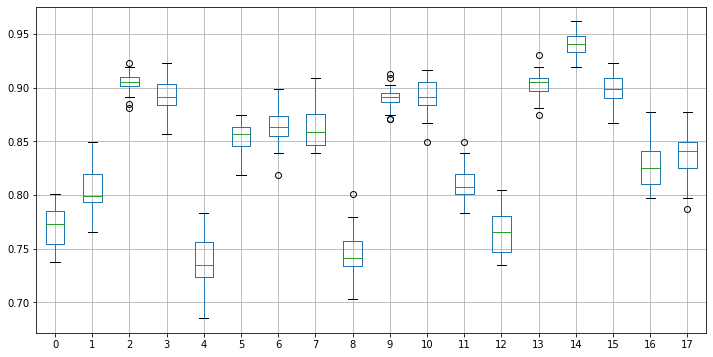

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '12'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.770804,0.019892,0.772727,12,0
1,0.805420,0.021800,0.798951,12,1
2,0.904196,0.010845,0.905594,12,2
3,0.892308,0.014947,0.891608,12,3
4,0.738287,0.025424,0.734266,12,4
5,0.852972,0.015198,0.856643,12,5
6,0.865035,0.020051,0.863636,12,6
7,0.862762,0.019937,0.858392,12,7
8,0.744930,0.022301,0.741259,12,8
9,0.890734,0.011562,0.891608,12,9
